In [4]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab as plb
import csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import odr
from scipy.constants import hbar, m_p, e, h

plt.style.use('untitled1.txt')

$$\require{mhchem}$$

# Aims

# Demonstration of NMR spectra of protons in glycerine and polystyrene

## Aims

## Experimental method

### Experimental set-up

### Better title

We then obtain the resonnance frequency as a function of current and voltage for Glycerine, polystyrene, PTFE and polythene in the following table.

 element   | current (A) | voltage (V) | resonnant frequency (MHz)
:---------:|:-----------:|:-----------:|:------------------------:
glycerine  | 3.199       | 7.450       | 17.7378
PTFE       | 3.193       | 7.580       | 16.8705
Polystyrene| 3.206       | 7.670       | 17.8593
Polythene  | 3.205       | 7.670       | 17.8781

Even though the errors were not estimated here, we notice that the resonnant frequency of PTFE is different from the rest, being $\approx 1 \mathrm{MHz}$ lower at $17 \mathrm{MHz}$, while the rest are at $18 \mathrm{MHz}$. We were given the molecular formula for glycerine and polystyrene (respectively $\ce{C3H5(OH)3}$ and $\ce{(C8H8)_{n}}$). So their resonnance frequency would correspond to $\ce{^{1}H}$. As the resonnant frequency for polythene is similar, I predict that it would come from $\ce{^{1}H}$, and as the one PTFE is appreciably different, it most likely comes from $\ce{^{19}F}$. 

From wikipedia, the molecular formula for PTFE or Polytetrafluoroethylene (which is a dead giveaway) is $\ce{(C2F4)_{n}}$ and the one for polythene is $\ce{(C2H4)_{n}}$, which confirms the previous conclusions.

## Results and Discussion

Talk about the affect on current on the measurements, is it bad that it changed somewhat throughout the measurements?
Same for Voltage

Talk about theoretical value, and how it compares

Talk about uncertainties, and their effect on the conlusions

Talk about spins and how they would affect the equation, relate to eq (11) in lab script

# Determination of the g-factor of protons and fluorine

## Aims

## Experimental method

### Experimental set-up

### Calibration

ADD WHAT ALZBETA DID EXACTLY

To calibrate the coils, we took measurements of magnetic field for current increasing from $3$ to $4 \mathrm{A}$ and current decreasing from $4$ to $3\mathrm{A}$. These should be different because of iron is a ferromagnet, which means it's anisotropic (according to what???).

We estimate that the absolute error on $B$, the measured magnetic field, to be $2 \, \mathrm{mT}$, and the absolute error on $I$, the measured current, to be $0.002 \, \mathrm{A}$. This is because during the measurement, $I$ and $B$ would deviate by about that much.

First plotting magnetic field against current for both measurements.

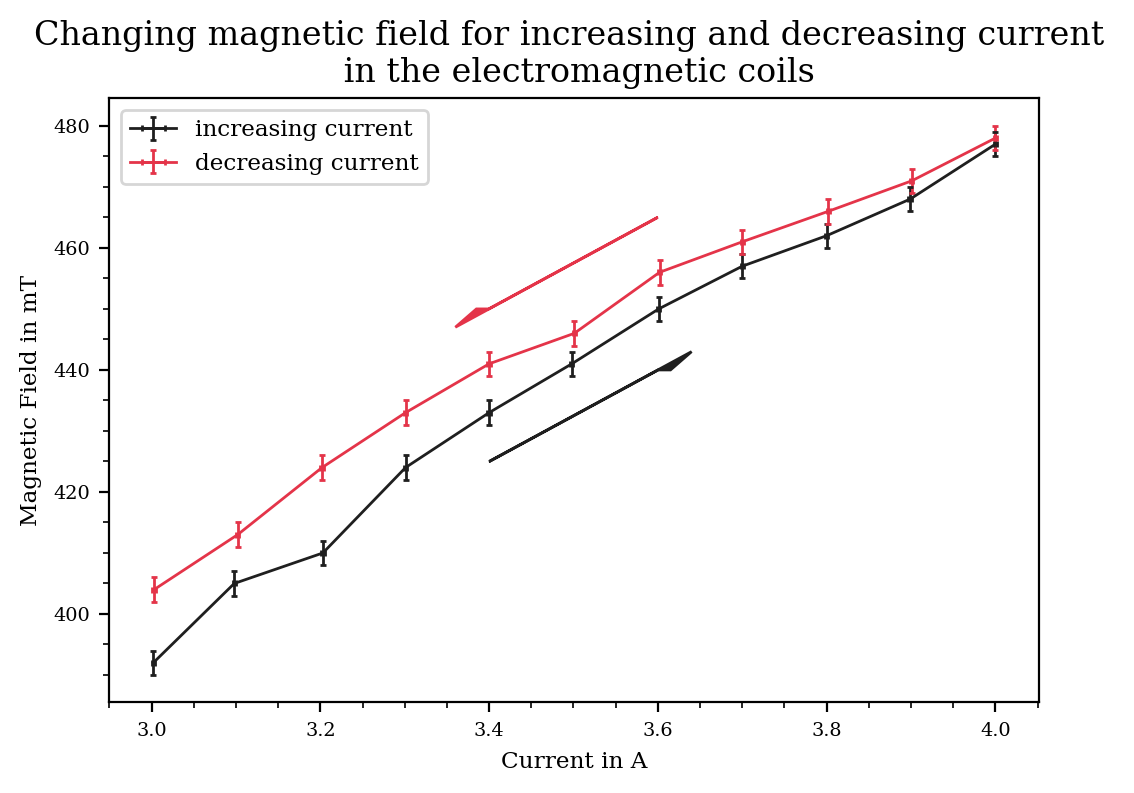

In [5]:
#loading measurements for increasing current:

I1, B1 = np.loadtxt('Calibration_3to4A.csv', delimiter = ';', skiprows=1, unpack = True)

#loading measurements for increasing current:

I2, B2 = np.loadtxt('Calibration_4to3A.csv', delimiter = ';', skiprows=1, unpack = True)

#errors
err_I = 0.002 #A
err_B = 2     #mT

#Plotting

plt.errorbar(I1, B1, xerr = np.ones_like(I1)*err_I, yerr = np.ones_like(B1)*err_B, label = 'increasing current')
plt.arrow(x=3.4, y=425, dx=0.2, dy=15, width = 0.001, head_width = 0.03, head_length = 3, shape = 'left', color = '#1F1F1F') 

plt.errorbar(I2, B2, xerr = np.ones_like(I2)*err_I, yerr = np.ones_like(B2)*err_B, label = 'decreasing current')
plt.arrow(x=3.6, y=465, dx=-0.2, dy=-15, width = 0.001, head_width = 0.03, head_length = 3, shape = 'left', color = '#E43449')

plt.xlabel('Current in A')
plt.ylabel('Magnetic Field in mT')
plt.title('Changing magnetic field for increasing and decreasing current \n in the electromagnetic coils')

plt.legend()
plt.savefig('NMR_graph-BvA.pdf')
plt.show()

Here, although one could argue that the curves are approximately the same towards higher currents (as they are less than 2 standard deviations away from each other), it is clearly not the case towards lower wavelength, as the two curves diverge. This means that the relation is anisotropic **(etc etc hysteresis)**. Also why don't we get the full loop? (extends to the negatives, often symetric wrt origin).

Want to fit power series through **increasing** current. This is because any continuous function can be approximated by a power series expansion (Taylor approximation). Because I don't know what degree of polynomial would fit best, I'll try to fit the function for an inceasing degree number, and see what the fit looks like. I'll then define another function for the polynomial I chose for the fit (this is because `curve_fit` does not like having a free parameter for the degree and can't calculate the covariance matrix, so, to make it fixed, I have to redefine the function).  I'll also do a plot of the residuals and compare.

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 1 are [  2.         146.25001522  83.37878117]


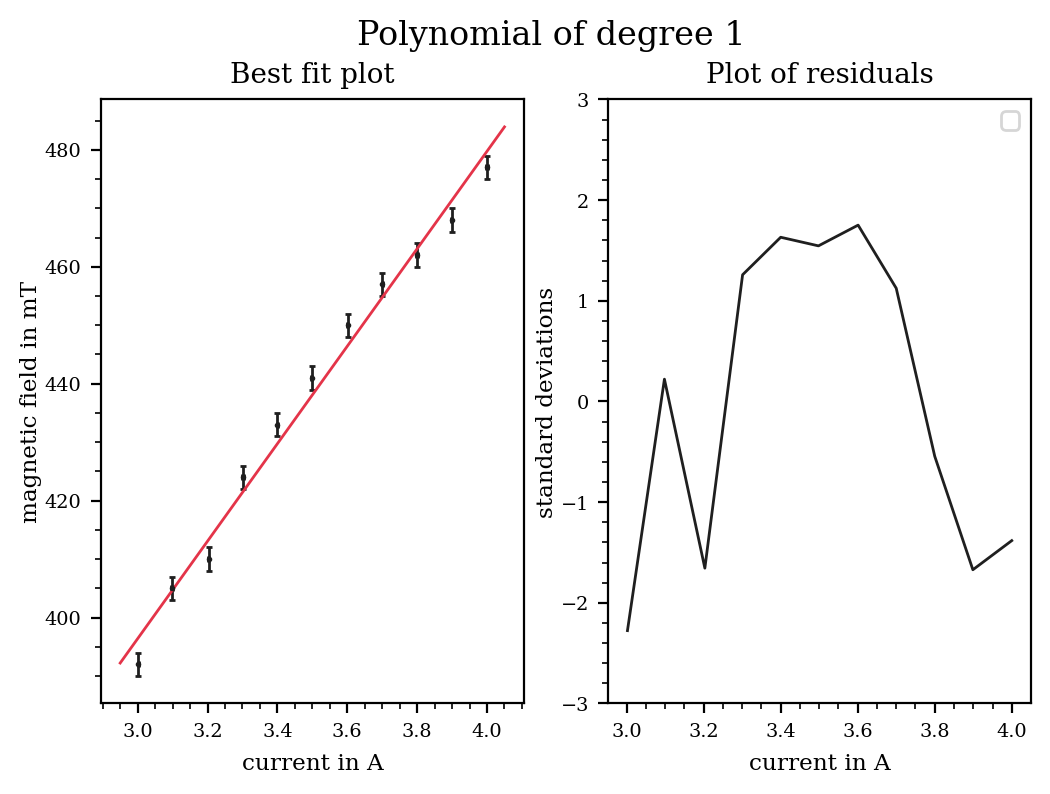

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 2 are [   3.         -197.39820841  281.33967358  -28.2771715 ]


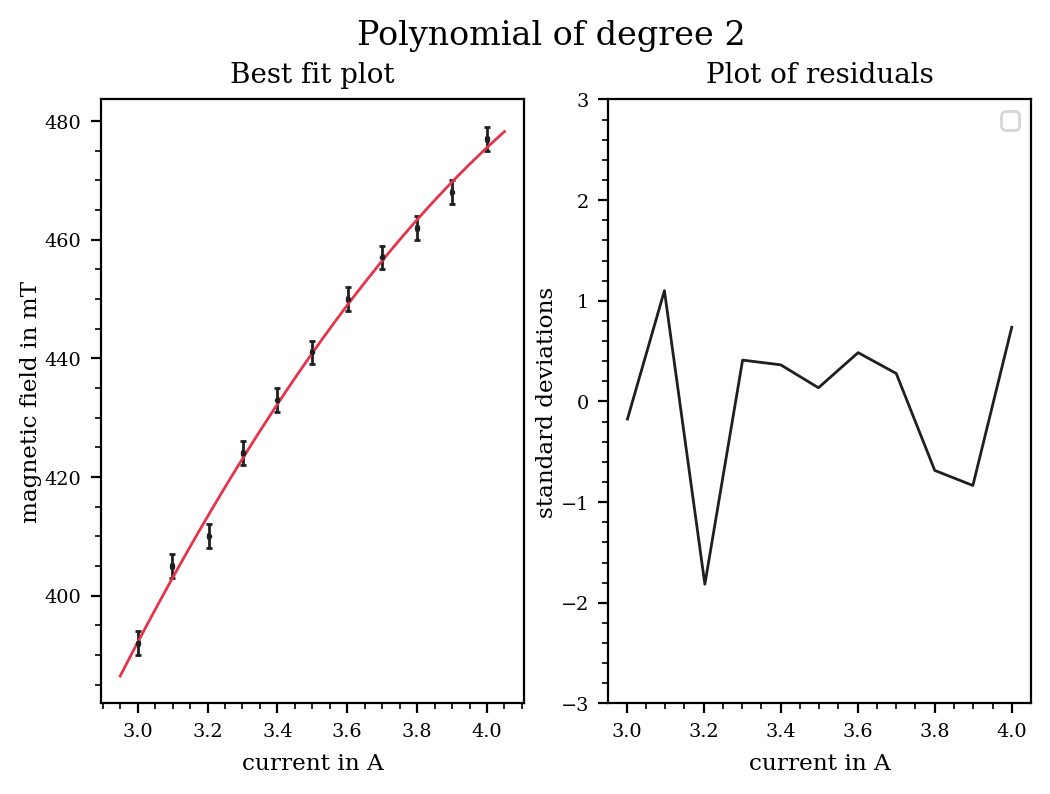

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 3 are [   4.         -438.00659175  489.56901777  -88.05203575    5.69208686]


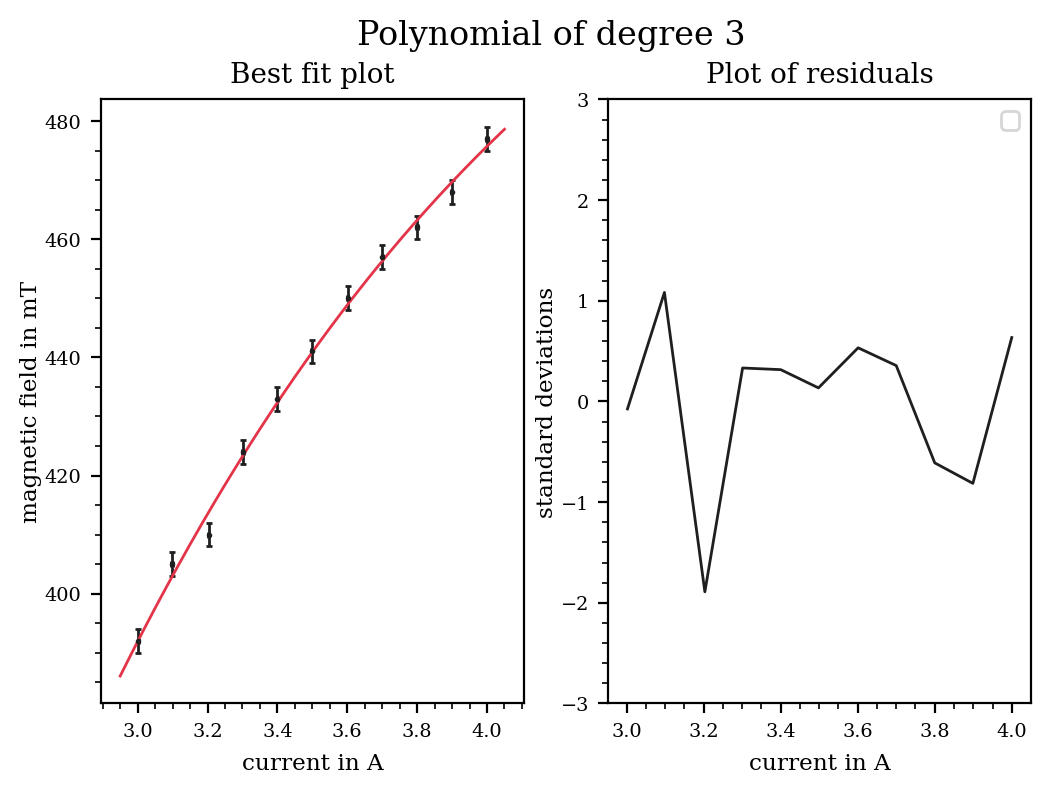

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 4 are [ 5.00000000e+00  1.73834858e+04 -2.00786497e+04  8.78313278e+03
 -1.68901774e+03  1.20994961e+02]


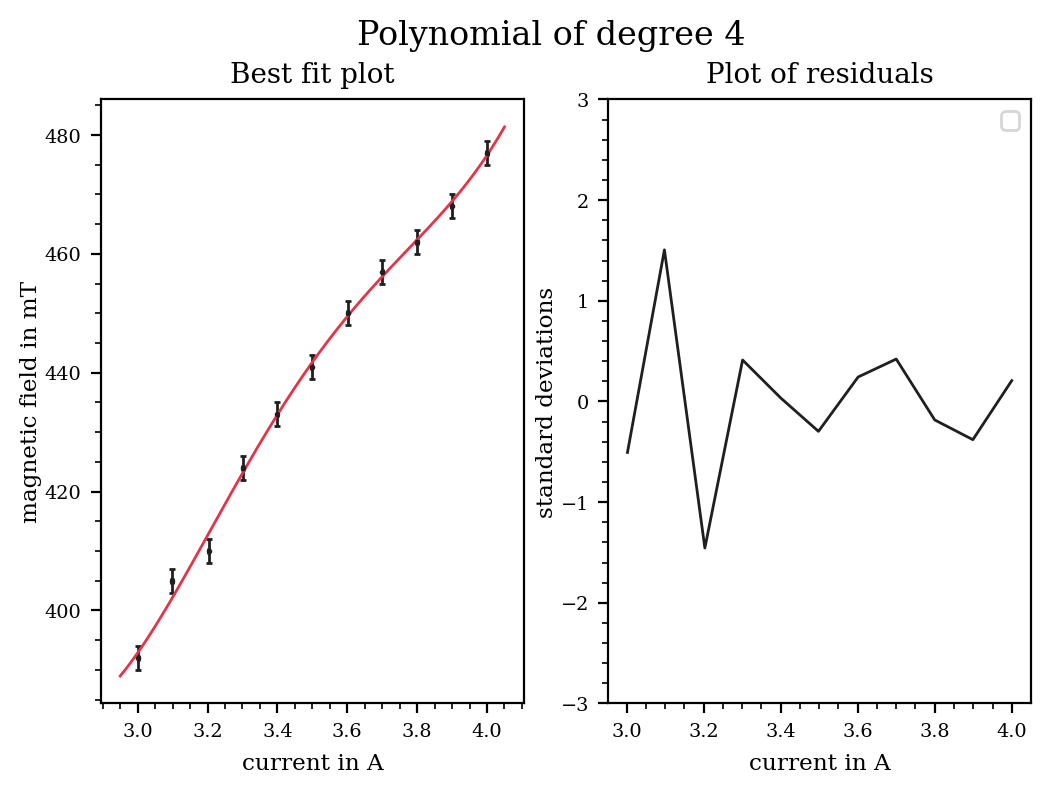

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.


best fit parameters for polynomial of degree 5 are [ 6.00000000e+00 -2.01975540e+05  2.96452845e+05 -1.73439625e+05
  5.06260366e+04 -7.36924082e+03  4.27865779e+02]


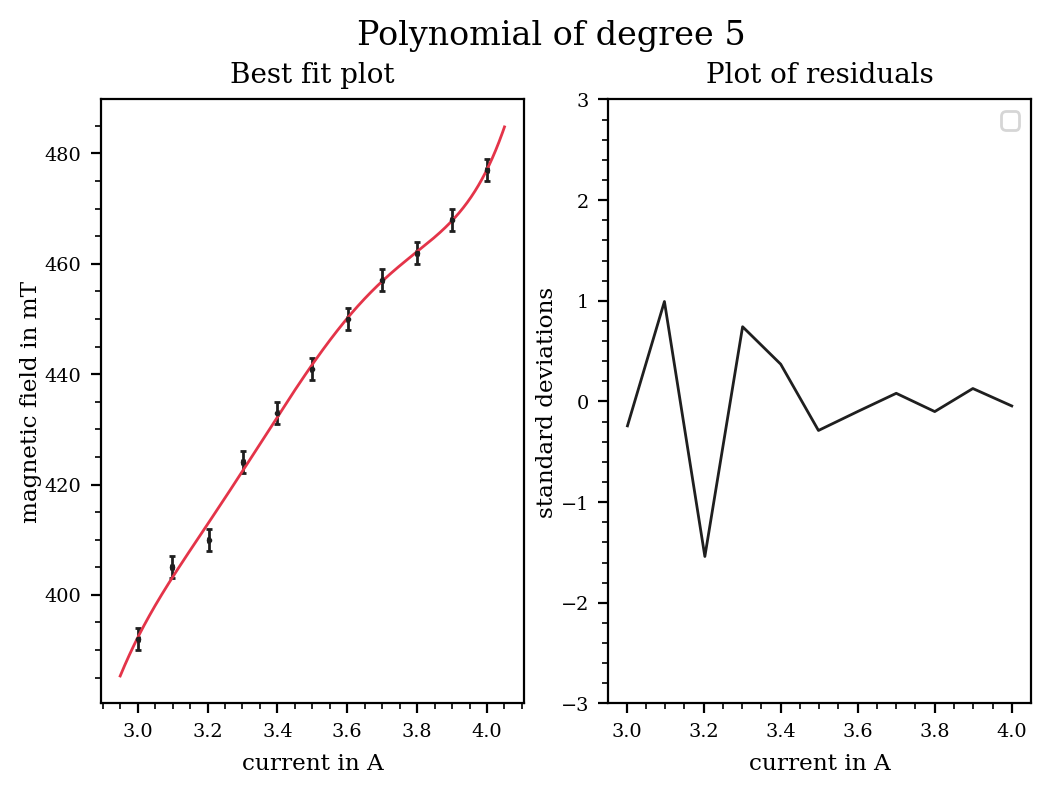

In [6]:
#define power series

def polynomial_function(x, n, *params):
    "polynomial of degree n-1, ie y = a + bx + cx^2 + ... + dx^(n-1)"
    # n-1 is the degree
    # params are the coefficients, from lowest to highest degree of the polynomial
    y = 0
    n = int(n)
    for i in range(n):
        y = params[i]*x**i + y
    return y

#for first 5 polynomials (not doing constant function though)

for i in range(2, 7):
    
    #set best fit parameters (degree of the polynomial and coefficients)
    degree       = np.ones(1)*i
    coefficients = np.ones(i)
    params       = np.concatenate((degree, coefficients))
    
    #do the best fit
    p, pcov = curve_fit(polynomial_function, I1, B1, p0 = params, sigma = err_B*np.ones_like(B1))
    print('best fit parameters for polynomial of degree {0} are'.format(i-1), p)
   
    #residuals
    residual = (B1 - polynomial_function(I1, *p))/err_B*np.ones_like(B1) #in terms of standard deviations of B-term
    
    #plotting with subplots
        #best fit
    I = np.linspace(2.95, 4.05, 1000) #dummy current
    
    ax1 = plt.subplot(1, 2, 1)
    plt.errorbar(I1, B1, xerr = err_I*np.ones_like(I1), yerr = err_B*np.ones_like(B1), fmt = '.', label = 'measured data')
    plt.plot(I, polynomial_function(I, *p), label = 'best fit')
    
    plt.xlabel('current in A')
    plt.ylabel('magnetic field in mT', labelpad=1)
    plt.title('Best fit plot', fontsize = 10)
    
        #residuals
    
    ax2 = plt.subplot(1, 2, 2)
    plt.plot(I1, residual)
    
    plt.xlabel('current in A')
    plt.ylabel('standard deviations', labelpad=1)
    plt.title('Plot of residuals', fontsize = 10)
    plt.ylim(-3, 3)
    
    plt.suptitle('Polynomial of degree {0}'.format(i-1))
    plt.legend()
    plt.show()

In FIG!!!, we see that all of these fits are ok for the data, as they all fall within the ballpark values of 3 standard deviations away (as can be seen in figs ???). This means we have to argue about what happens physically. We can't really choose a straight line fit, as the would negate the fact that we have visible hysteresis going on for our data range. Further, we can't chose a polynomial of high degree because it starts fitting the noise in our data, which means the curve 'wiggles' in the curve does not represent anything physical, but the variance in our data, as we see in figure ?? and ??. That's why chosing a fit of degree 3 is probably the best solution. Notice that the plots of both the residuals and the best fit for degrees 2 and 3 are nearly identical, which means we could also have chosen a polynomial of degree 2 for our fit.

For the fit, I'm not going to use a least-squares fit, but an orthogonal distance regression, which will allow the fit to account for the error in the current values (independent variable). Also, `scipy.odr` has a function for a polynomial model, `odr.polynomial(order)` which I'm going to use.

running the fit:
Beta: [-443.55634499  494.31611489  -89.39942229    5.81901054]
Beta Std Error: [1070.85852038  925.13180243  265.28502506   25.25146852]
Beta Covariance: [[ 1.18551158e+06 -1.02383730e+06  2.93295885e+05 -2.78721164e+04]
 [-1.02383730e+06  8.84807569e+05 -2.53637622e+05  2.41191504e+04]
 [ 2.93295885e+05 -2.53637622e+05  7.27557093e+04 -6.92308995e+03]
 [-2.78721164e+04  2.41191504e+04 -6.92308995e+03  6.59196492e+02]]
Residual Variance: 0.9672937730348018
Inverse Condition #: 3.043455945008479e-05
Reason(s) for Halting:
  Sum of squares convergence


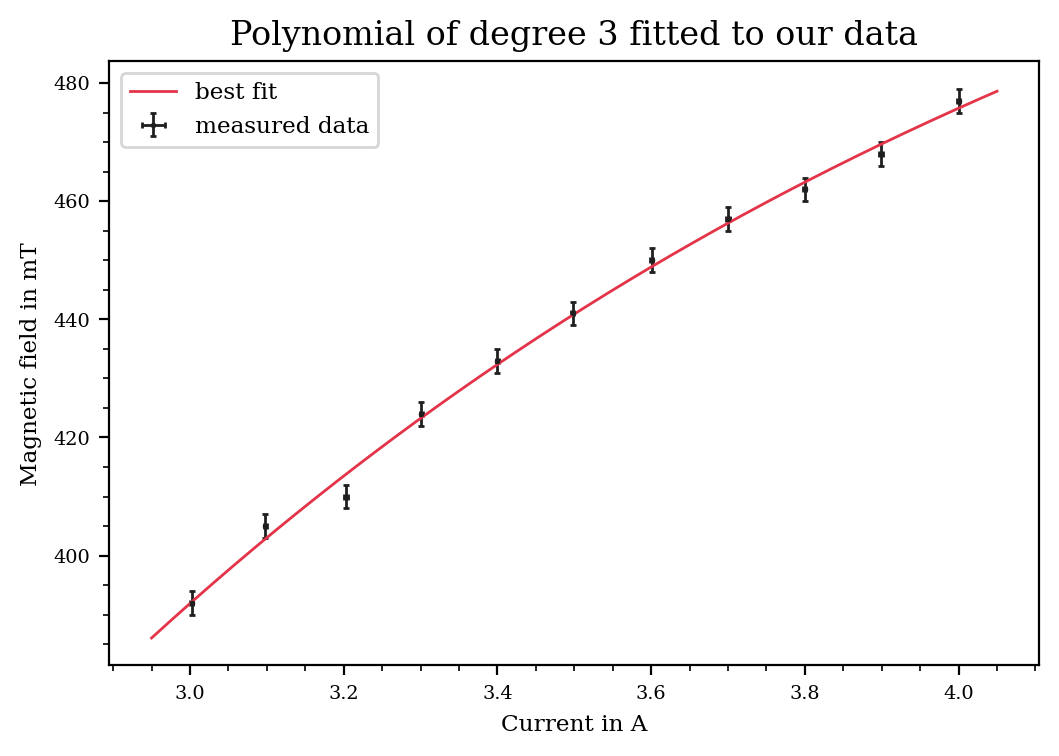

In [7]:
#doing the odr fit:

#defining third degree polynomial model
poly_model = odr.polynomial(3)

#Create RealData object with our measurements
mydata = odr.RealData(I1, B1, sx = err_I, sy = err_B)

# Set up ODR with the model and data.
myodr = odr.ODR(mydata, poly_model, beta0 = [-444., 494., -89., 5.8]) #initial guesses from previous ballpark fits

# Run the regression
myoutput = myodr.run()

# Use the in-built pprint method to give us results.
print('running the fit:')
myoutput.pprint()

#define arrays for parameters
calibration_params = myoutput.beta
calibration_errors = myoutput.sd_beta

#plot the best fit graph
plt.errorbar(I1, B1, xerr = err_I*np.ones_like(I1), yerr = err_B*np.ones_like(B1), fmt = '.', label = 'measured data')
plt.plot(I, polynomial_function(I, 4, *calibration_params), label = 'best fit')

plt.ylabel('Magnetic field in mT')
plt.xlabel('Current in A')
plt.title('Polynomial of degree 3 fitted to our data')

plt.legend()
plt.show()

The errors here are enormous (1 order of magnitude larger than the actual (absolute) values). I tried fitting the data using another fitting function, `optimize.curve_fit`, but I get approximately the same thing.

The big standard errors may be because our data is ill-conditioned. In that case, the solution would be to find a conditioning matrix and transform our data to a well-conditioned dataset. In any case, I don't have the time or the mathematical skills to sort it out. We see that all our data points are about half a standard deviation away in the y-axis, so I estimate that the overall error is $1 \mathrm{mT}$.

The equation for the calibration is then:

$$B = (-443 + 494 I -89 I^2 + 6 I^3) \pm 1 \, \mathrm{mT}$$

In [11]:
calibration_error = 1 #mT

We see that the calibration BLAH BLAH BLAH ANALYSIS!!!!!!!!!!!!!

### determining g-factor of H-1 and F-19

WHAT ALZBETA DID EXACTLY

Here, we want to determine the g-factor for both nuclides. To do this we'll fit a straight line through the graph of frequency $\nu$ against magnetic field $B_0$. (WHY STRAIGHT LINE???) From this, we'll find the slope $\nu / B_0$, and thus, we'll be able to calculate the g-factor, as, rearranging???, from the lab script, it equals:

$$g = \frac{h}{\mu_n} \frac{\nu}{B_0}$$

as we know (book values), both $h$ and $\mu_n$. SPECIFY

The absolute error on the frequency was estimated to be $0.0020 \mathrm{MHz}$ as this is the estimated increment when the frequency was changed.

running the fit:
Beta: [0.03705507 2.6582855 ]
Beta Std Error: [0.00067867 0.27642839]
Beta Covariance: [[ 2.97288830e-07 -1.20877078e-04]
 [-1.20877078e-04  4.93205269e-02]]
Residual Variance: 1.549307377807079
Inverse Condition #: 0.0001447090675106636
Reason(s) for Halting:
  Sum of squares convergence

This means the best fit line is nu = (0.0371 pm 0.0007)*B + (2.7 pm 0.3) for Glycerine


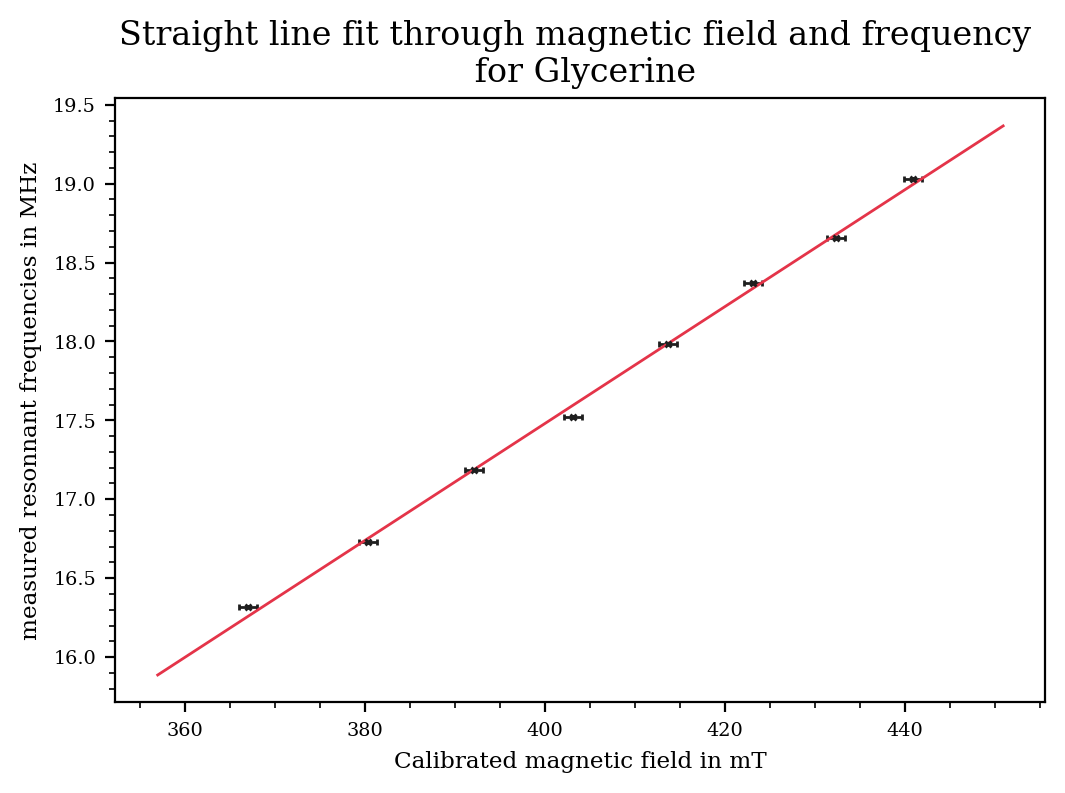

running the fit:
Beta: [0.03815008 1.02739972]
Beta Std Error: [0.00033096 0.14418922]
Beta Covariance: [[ 4.71885056e-07 -2.05375145e-04]
 [-2.05375145e-04  8.95663786e-02]]
Residual Variance: 0.23212427732135762
Inverse Condition #: 0.00010336415992665784
Reason(s) for Halting:
  Sum of squares convergence

This means the best fit line is nu = (0.0382 pm 0.0003)*B + (1.0 pm 0.1) for PTFE


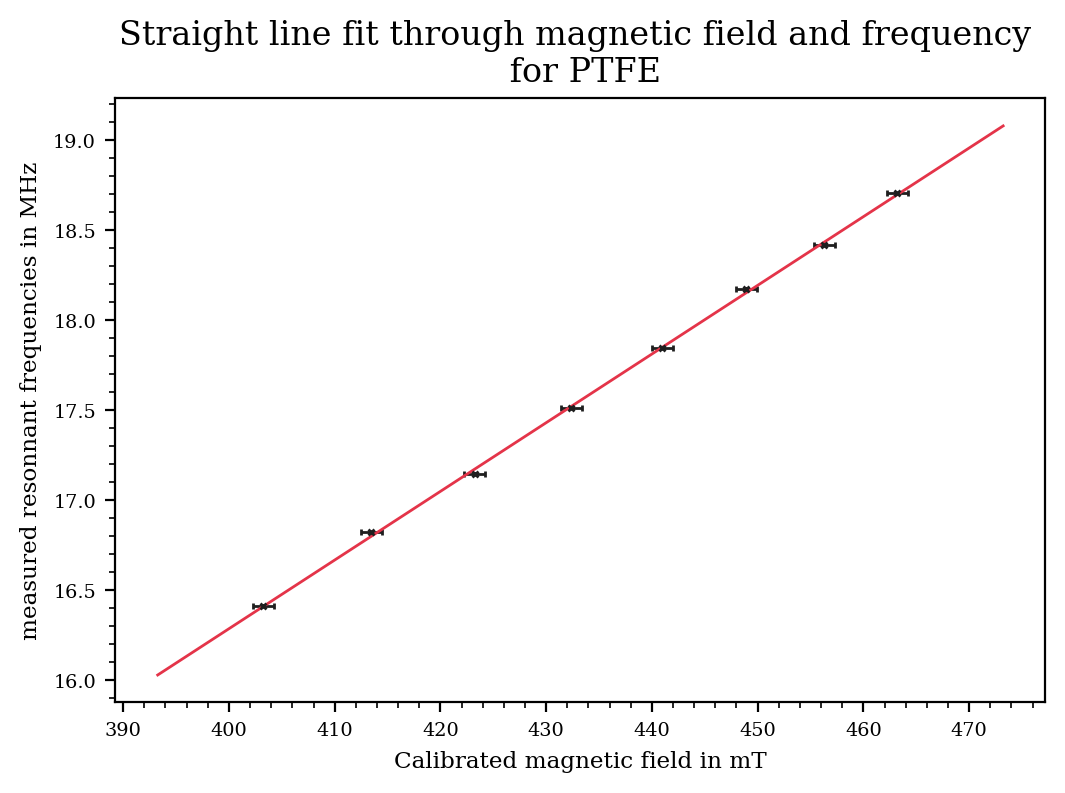

In [19]:
#setting up
file_names = ['Glycerine', 'PTFE'] #sample names
gradients  = []                    #empty array for nu/B
egradients = []                    #corresponding absolute error
offsets    = []                    #empty array for offsets
nue = 0.0020                       #MHz, error on frequency

#making a loop over these names

for file in file_names:
    #loading data
    current, frequency = np.loadtxt(file + '.csv', delimiter = ';', skiprows=1, unpack = True)
    
    #arrays for calibrated magnitude
    B_values     = []
    
    for i, C in enumerate(current):
        #calibrating the data
        mag = polynomial_function(C, 4, *calibration_params) #degree 3
        B_values.append(mag)
    
    #fitting the function using odr with a linear fit
    
       #Create RealData object with our measurements
    dat = odr.RealData(B_values, frequency, sx = calibration_error, sy = nue)

        # Set up ODR with the model and data.
    fit = odr.ODR(dat, odr.unilinear, beta0 = [1, 1]) #initial guesses to update

        # Run the regression
    out = fit.run()

        # Use the in-built pprint method to give us results.
    print('running the fit:')
    out.pprint()
    
        #define arrays for parameters
    slope, increment         = out.beta
    err_slope, err_increment = out.sd_beta
    
    gradients.append(slope)
    egradients.append(err_slope)
    offsets.append(increment)
    
    print('')
    print('This means the best fit line is nu = ({0:.4f} pm {1:.4f})*B + ({2:.1f} pm {3:.1f}) for {4}'.format(slope, err_slope, increment, err_increment, file))
    
    #plot
    
    dummy_B = np.linspace(min(B_values)-10, max(B_values)+10)
    plt.errorbar(B_values, frequency, fmt = 'x', xerr = calibration_error, yerr = nue)
    plt.plot(dummy_B, slope * dummy_B + increment, label = 'best fit')
    plt.xlabel('Calibrated magnetic field in mT')
    plt.ylabel('measured resonnant frequencies in MHz')
    plt.title('Straight line fit through magnetic field and frequency \n for {0}'.format(file))
    plt.show()


Note that the calibration is indeed valid over this range of $B_0$ values as the range of our calibration is $B_0 \in [390, 480]$.
Also notice that there is a significant y-offset for both elements, $\sim 10 \%$ of the actual y value. This is most likely due to an unforeseen systematic error, as we can see that the curve fits well in figure ???. Forcing the function to not have an offset (i.e. setting the function to be $y=mx$) would actually worsen the fit, and not actually make sense physically. This is why including the offset into the error for the slope might be a good idea. Taking the function $y = mx + c$, this would mean saying

$$\frac{y}{x} = m \pm \sigma(m) + \frac{c}{<x>}$$

so $\sigma(m) + \frac{c}{<x>}$ is the positive error, and $- \sigma(m)$ is the negative error on the slope, where $<x>$ is the average of $x$ values. In our case

In [31]:
av_B = np.average(B_values) #calculating average value

#positive errors
pose = egradients + offsets/av_B

#negative errors
nege = egradients

print('So nu/B for glycerine is {0:.4f} + {1:.2g} - {2:.1g} MHZ/mT'.format(gradients[0], pose[0], nege[0]))
print('And nu/B for PTFE is {0:.4f} + {1:.2g} - {2:.1g} MHZ/mT'.format(gradients[1], pose[1], nege[1]))

So nu/B for glycerine is 0.0371 + 0.0068 - 0.0007 MHZ/mT
And nu/B for PTFE is 0.0382 + 0.0027 - 0.0003 MHZ/mT


ANALYSIS INCLUDING GOODNESS OF FIT AND RANGE OF Bs OVER WHICH CALIBRATION WORKS (link to ploynomial).
ALSO ERRORBARS ONCE TALKED TO DEMONSTRATOR AND VALUE OF INCREMENT AND ERROR IT WOULD ADD! offset/B_0???


We can now calculate the g_factors for each of these, noting that

$$\mu_n = \frac{e \hbar}{2m_p}$$

And all of these were imported in the preambule.

In [37]:
#calculating nuclear magneton
mu_n = (e*hbar)/(2*m_p)

#converting slopes into SI units
grad     = 1e9*np.array(gradients)  #1/T.s
eposgrad = 1e9*np.array(pose)       #1/T.s
eneggrad = 1e9*np.array(nege)

#calculating g factor for glycerine (H) and PTFE (F)
g_H, g_F           = (h/mu_n)*grad
eposg_H, eposg_F   = (h/mu_n)*eposgrad #assuming no error on the h and mu_n (which is true to the precision of this experiment)
eneg_g_H, eneg_g_F = (h/mu_n)*eneggrad

print('the g-factor for H-1 is then {0:.2f} + {1:.2g} - {2:.1g}'.format(g_H, eposg_H, eneg_g_H))
print('the g-factor for F-19 is then {0:.2f} + {1:.2g} - {2:.1g}'.format(g_F, eposg_F, eneg_g_F))

the g-factor for H-1 is then 4.86 + 0.89 - 0.09
the g-factor for F-19 is then 5.00 + 0.35 - 0.04


Note that the g-factor is a proportionality constant, and is therefore dimentionless.

## Results



# Discussion and Conclusion